# Imports

In [ ]:
import sys
sys.path.insert(0, '..')

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional,Tuple
from tqdm import tqdm
from scipy import stats



from config import session_length
from DB_connection import DB_connection
from plots import plot_with_flags, plot_proportions_evolution, plot_diversity_evolution
from metrics import compute_lean_score, compute_rank_aware_lean_score, compute_proportions, compute_rank_aware_proportions, compute_shanon_entropy
from query_db_functions import (get_context_videos, get_recommended_videos_during_context_phase, get_chosen_videos_during_navigation_phase,
                                get_recommended_videos_during_navigation_phase, get_sessions_by_profile)


db_connection = DB_connection()


# Useful function

# 1. Analysis

## 1.1. General metrics

### Number of videos by stance

In [6]:
print('number undifined videos :',len(db_connection.select("SELECT * FROM annoted_videos WHERE llm_label IS 'Undefined' ")))
print('number of unrelated videos :',len(db_connection.select("SELECT * FROM annoted_videos WHERE llm_label IS 'Unrelated' ")))
print('number of pro israel videos :',len(db_connection.select("SELECT * FROM annoted_videos WHERE llm_label IS 'Pro-Israel' ")))
print('number of pro palestine videos :',len(db_connection.select("SELECT * FROM annoted_videos WHERE llm_label IS 'Pro-Palestine' ")))
print('number of neutral videos :',len(db_connection.select("SELECT * FROM annoted_videos WHERE llm_label IS 'Neutral' ")))

number undifined videos : 397
number of unrelated videos : 7969
number of pro israel videos : 4079
number of pro palestine videos : 3862
number of neutral videos : 1794


### Number of sessions per profile

In [ ]:
sessions_pro_israel_low_div_En = get_sessions_by_profile('Pro_israel_low_div_En_v3') 
sessions_pro_palestine_low_div_En = get_sessions_by_profile('Pro_palestine_low_div_En_v3')
sessions_neutral_low_div_en = get_sessions_by_profile('Neutral_low_div_En_v3')
sessions_pro_israel_high_div_En = get_sessions_by_profile('Pro_israel_high_div_En_v3')
sessions_pro_palestine_high_div_En = get_sessions_by_profile('Pro_palestine_high_div_En_v3')

print("Number of Pro-Israel (low diversity) sessions :",len(sessions_pro_israel_low_div_En))
print("Number of Pro-Palestine (low diversity) sessions :",len(sessions_pro_palestine_low_div_En))
print("Number of Neutral sessions :", len(sessions_neutral_low_div_en))
print("Number of Pro-Israel (high diversity) sessions :", len(sessions_pro_israel_high_div_En))
print("Number of Pro-Palestine (high diversity) sessions :",len(sessions_pro_palestine_high_div_En))



Number of Pro-Israel (low diversity) sessions : 52
Number of Pro-Palestine (low diversity) sessions : 57
Number of Neutral sessions : 49
Number of Pro-Israel (high diversity) sessions : 30
Number of Pro-Palestine (high diversity) sessions : 48


For users: Pro-Israel (low div)


100%|██████████| 52/52 [00:28<00:00,  1.85it/s]

LEAN
Lean of context videos :  0.0
Lean of chosen videos :  -0.9342533936651585
Lean of receommended videos during context phase : 0.1733106907923103
Rank-aware Lean of receommended videos during context phase : 0.1691240832934749
Lean of receommended videos during navigation phase : -0.06902637041563045
Rank-aware Lean of receommended videos during navigation phase : -0.08879270060626067
 
PROPORTIONS


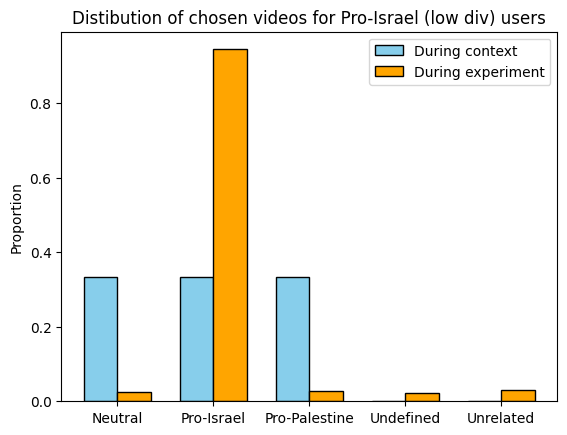

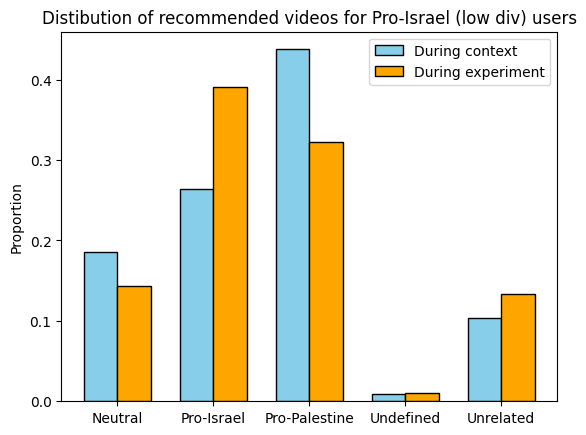

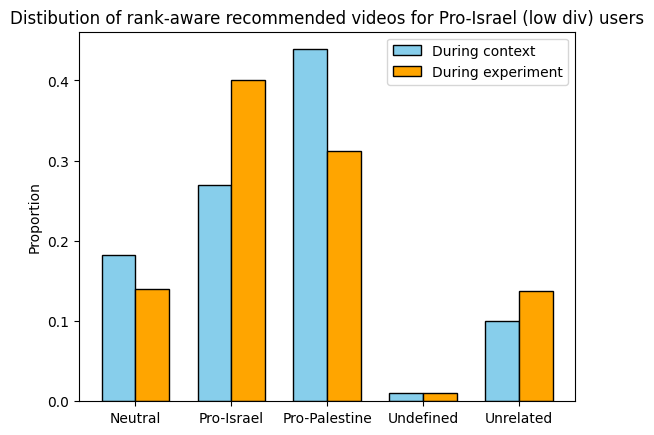

{'Neutral': 0.18184998312926204, 'Pro-Israel': 0.26976505637050824, 'Pro-Palestine': 0.4388891396639832, 'Undefined': 0.01022045794832382, 'Unrelated': 0.09947191015615965}
{'Pro-Palestine': 0.4378017013468835, 'Pro-Israel': 0.2644910105545733, 'Neutral': 0.185296105098967, 'Unrelated': 0.1036120673462803, 'Undefined': 0.008971647332772234}
 
 
For users: Pro-Palestine (low div)


100%|██████████| 57/57 [00:30<00:00,  1.87it/s]

LEAN
Lean of context videos :  0.0
Lean of chosen videos :  0.9331584017735858
Lean of receommended videos during context phase : 0.19192939321837188
Rank-aware Lean of receommended videos during context phase : 0.19572929822649862
Lean of receommended videos during navigation phase : 0.5785262421180036
Rank-aware Lean of receommended videos during navigation phase : 0.5925207638794592
 
PROPORTIONS


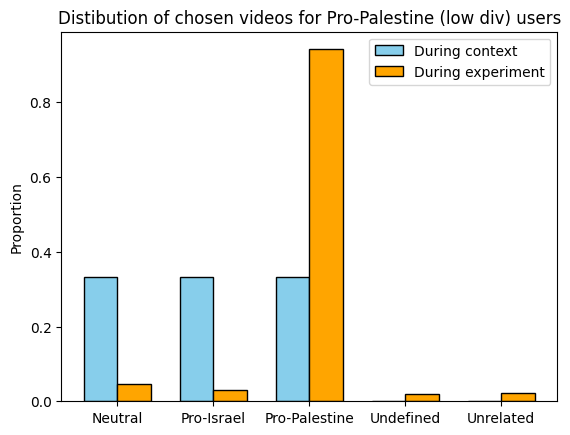

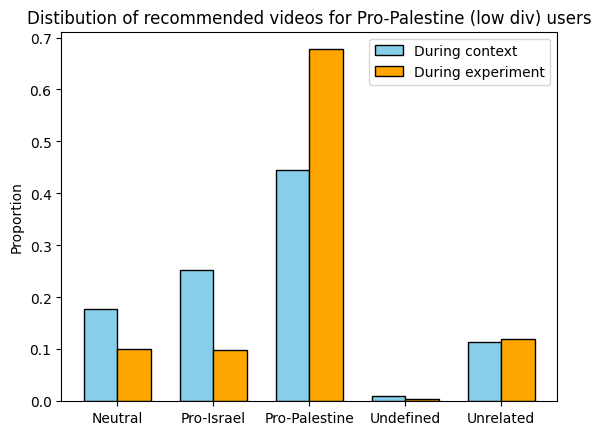

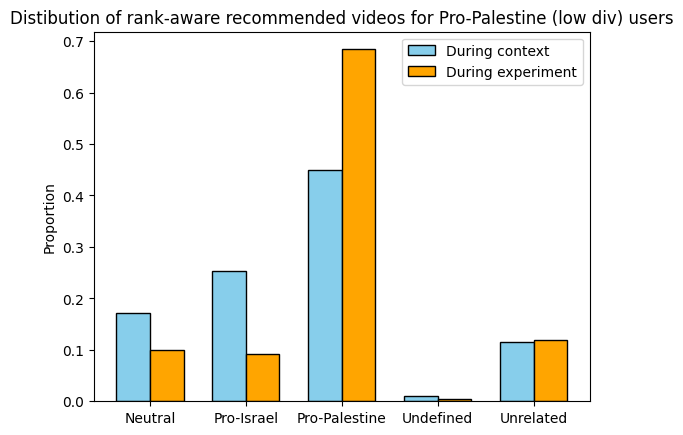

{'Neutral': 0.1720660372615419, 'Pro-Israel': 0.25409694322948956, 'Pro-Palestine': 0.44982624145598815, 'Undefined': 0.009550155848078848, 'Unrelated': 0.11462816879872745}
{'Pro-Palestine': 0.4451232689593882, 'Pro-Israel': 0.2531938757410163, 'Neutral': 0.17761852932108224, 'Unrelated': 0.11498537051303864, 'Undefined': 0.00924107967021524}
 
 
For users: Neutral


100%|██████████| 49/49 [00:26<00:00,  1.85it/s]

LEAN
Lean of context videos :  0.0
Lean of chosen videos :  0.11216941846197322
Lean of receommended videos during context phase : 0.2086945953014896
Rank-aware Lean of receommended videos during context phase : 0.21021165700220498
Lean of receommended videos during navigation phase : 0.24587719132748628
Rank-aware Lean of receommended videos during navigation phase : 0.23315218362764484
 
PROPORTIONS


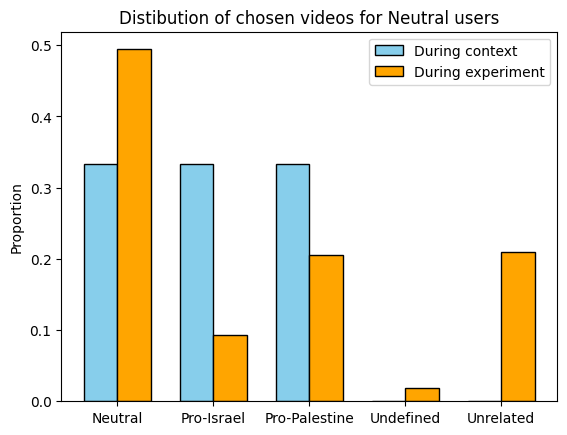

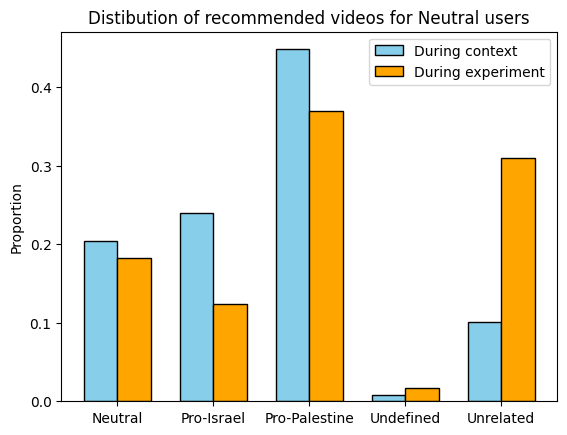

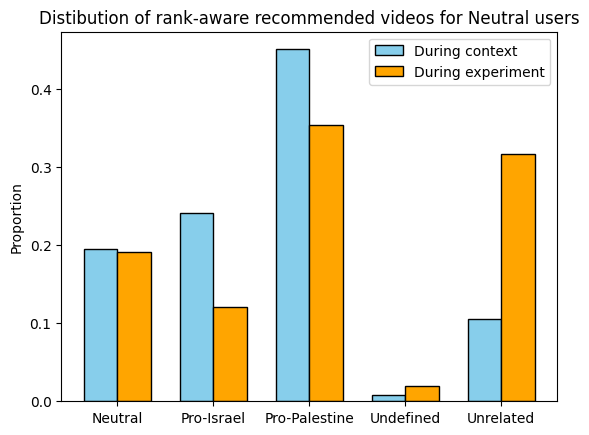

{'Neutral': 0.1949904788413428, 'Pro-Israel': 0.2405477791789869, 'Pro-Palestine': 0.4507594361811919, 'Undefined': 0.0086489807868633, 'Unrelated': 0.10540634463556871}
{'Pro-Palestine': 0.44809315889244766, 'Pro-Israel': 0.23939856359095799, 'Neutral': 0.20431914455846714, 'Unrelated': 0.10029950972492556, 'Undefined': 0.008225351881423036}
 
 
For users: Pro-Israel (high div)


100%|██████████| 30/30 [00:18<00:00,  1.64it/s]

LEAN
Lean of context videos :  0.0
Lean of chosen videos :  -0.9420784313725491
Lean of receommended videos during context phase : 0.2150053116035219
Rank-aware Lean of receommended videos during context phase : 0.20846770155973304
Lean of receommended videos during navigation phase : -0.1956939493253963
Rank-aware Lean of receommended videos during navigation phase : -0.21819651064489187
 
PROPORTIONS


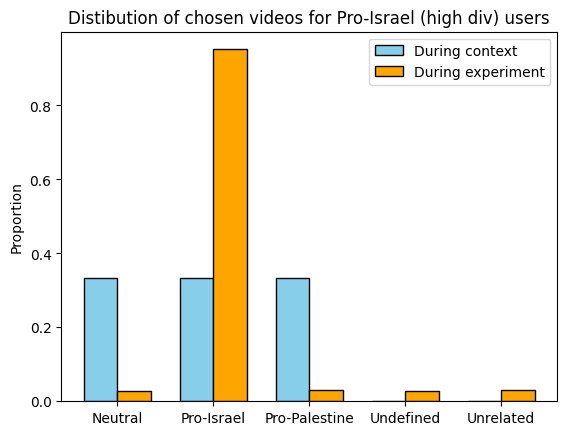

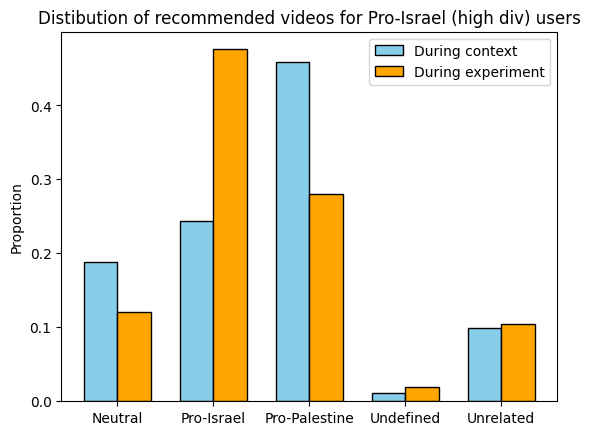

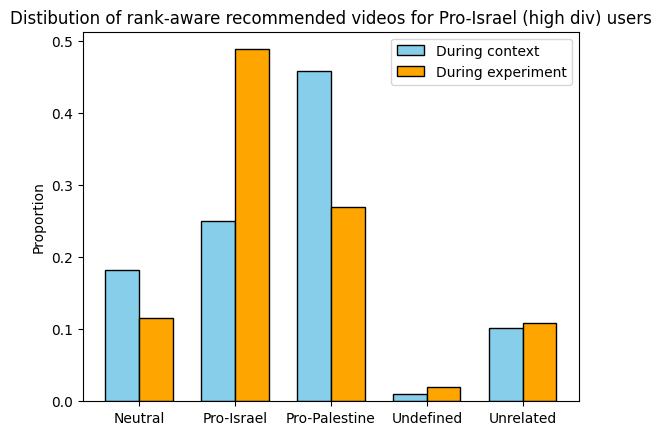

{'Neutral': 0.18186114951480478, 'Pro-Israel': 0.24948589318155634, 'Pro-Palestine': 0.45795359474128944, 'Undefined': 0.009704010629638661, 'Unrelated': 0.10196575299567456}
{'Pro-Palestine': 0.4588443253127971, 'Pro-Israel': 0.24383901370927522, 'Neutral': 0.18839947022301765, 'Unrelated': 0.09926415734530272, 'Undefined': 0.010725592677341488}
 
 
For users: Pro-Palestine (high div)


100%|██████████| 48/48 [00:27<00:00,  1.76it/s]

LEAN
Lean of context videos :  0.0
Lean of chosen videos :  0.968957951492404
Lean of receommended videos during context phase : 0.1958599651066609
Rank-aware Lean of receommended videos during context phase : 0.19343385699562532
Lean of receommended videos during navigation phase : 0.615453148916901
Rank-aware Lean of receommended videos during navigation phase : 0.6368526714617042
 
PROPORTIONS


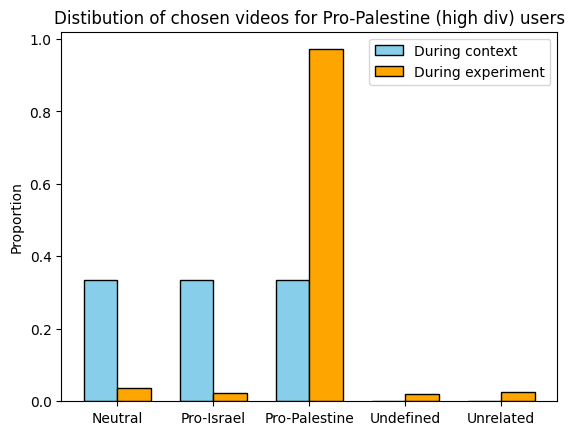

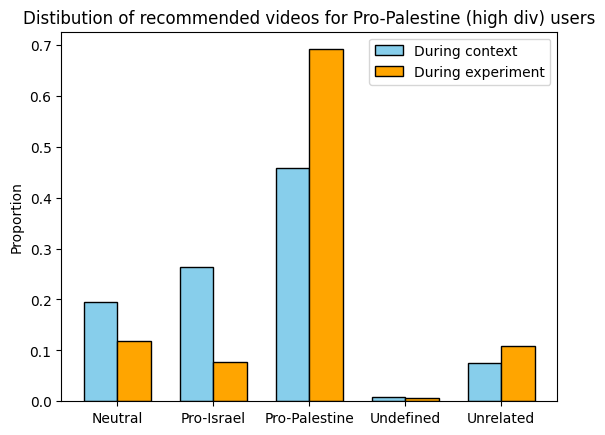

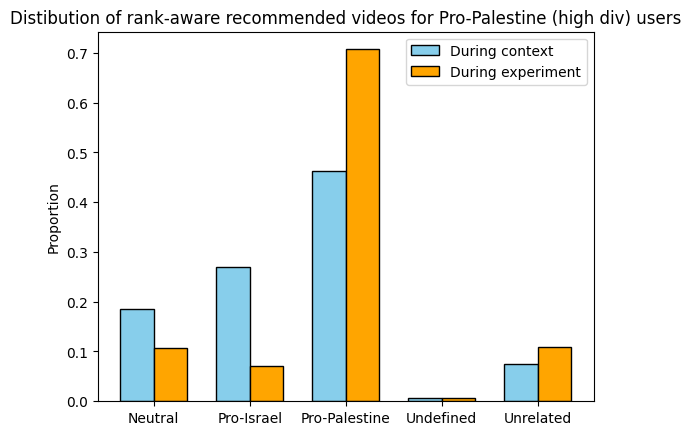

{'Neutral': 0.18572339193931908, 'Pro-Israel': 0.26985183268525476, 'Pro-Palestine': 0.4632856896808801, 'Undefined': 0.007411132206338269, 'Unrelated': 0.07403675066347194}
{'Pro-Palestine': 0.459030549030242, 'Pro-Israel': 0.2631705839235811, 'Neutral': 0.19410447698817665, 'Unrelated': 0.07576749824898811, 'Undefined': 0.00827153927896919}
 
 


In [ ]:

for group,users in zip(("Pro-Israel (low div)","Pro-Palestine (low div)","Neutral",
                        "Pro-Israel (high div)","Pro-Palestine (high div)"),[sessions_pro_israel_low_div_En,sessions_pro_palestine_low_div_En,
                                                                 sessions_neutral_low_div_en,sessions_pro_israel_high_div_En,
                                                                 sessions_pro_palestine_high_div_En]):
    print(f"For users: {group}")

    all_leans = {
        "context": [],
        "recommended_context": [],
        "rank_aware_recommended_context": [],
        "chosen_navigation": [],
        "recommended_navigation": [],
        "rank_aware_recommended_navigation": []
    }

    all_entropies = {
        "context": [],
        "recommended_context": [],
        "chosen_navigation": [],
        "recommended_navigation": []
    }

    all_proportions = {
        "context": [],
        "recommended_context": [],
        "rank_aware_recommended_context": [],
        "chosen_navigation": [],
        "recommended_navigation": [],
        "rank_aware_recommended_navigation": []
    }


    for session in tqdm(users):
        context_videos = get_context_videos(session)
        recommended_videos_during_context_phase = get_recommended_videos_during_context_phase(session)
        chosen_videos_during_navigation_phase = get_chosen_videos_during_navigation_phase(session)
        recommended_videos_during_navigation_phase = get_recommended_videos_during_navigation_phase(session)

        all_leans["context"].append(compute_lean_score(context_videos))
        all_leans["recommended_context"].append(compute_lean_score(recommended_videos_during_context_phase))
        all_leans["rank_aware_recommended_context"].append(compute_rank_aware_lean_score(recommended_videos_during_context_phase))
        all_leans["chosen_navigation"].append(compute_lean_score(chosen_videos_during_navigation_phase))
        all_leans["recommended_navigation"].append(compute_lean_score(recommended_videos_during_navigation_phase))
        all_leans["rank_aware_recommended_navigation"].append(compute_rank_aware_lean_score(recommended_videos_during_navigation_phase))

        all_entropies["context"].append(compute_shanon_entropy(compute_proportions(context_videos)))
        all_entropies["recommended_context"].append(compute_shanon_entropy(compute_proportions(recommended_videos_during_context_phase)))
        all_entropies["chosen_navigation"].append(compute_shanon_entropy(compute_proportions(chosen_videos_during_navigation_phase)))
        all_entropies["recommended_navigation"].append(compute_shanon_entropy(compute_proportions(recommended_videos_during_navigation_phase)))


        all_proportions["context"].append(compute_proportions(context_videos))
        all_proportions["recommended_context"].append(compute_proportions(recommended_videos_during_context_phase))
        all_proportions["rank_aware_recommended_context"].append(compute_rank_aware_proportions(recommended_videos_during_context_phase))
        all_proportions["chosen_navigation"].append(compute_proportions(chosen_videos_during_navigation_phase))
        all_proportions["recommended_navigation"].append(compute_proportions(recommended_videos_during_navigation_phase))
        all_proportions["rank_aware_recommended_navigation"].append(compute_rank_aware_proportions(recommended_videos_during_navigation_phase))


    mean_proportions = {phase: pd.DataFrame(props).mean().to_dict()
                        for phase, props in all_proportions.items()}
    print("LEAN")
    print('Lean of context videos : ',np.mean(all_leans['context']))
    print('Lean of chosen videos : ',np.mean(all_leans['chosen_navigation']))
    print('Lean of receommended videos during context phase :',np.mean(all_leans['recommended_context']))
    print('Rank-aware Lean of receommended videos during context phase :',np.mean(all_leans['rank_aware_recommended_context']))
    print('Lean of receommended videos during navigation phase :',np.mean(all_leans['recommended_navigation']))
    print('Rank-aware Lean of receommended videos during navigation phase :',np.mean(all_leans['rank_aware_recommended_navigation']))
    print(" ")
    print("PROPORTIONS")
    plot_proportions_evolution(mean_proportions['context'],mean_proportions['chosen_navigation'], 
                               title = f"Distibution of chosen videos for {group} users")
    plot_proportions_evolution( mean_proportions['recommended_context'],mean_proportions['recommended_navigation'],
                               title = f"Distibution of recommended videos for {group} users")
    plot_proportions_evolution( mean_proportions['rank_aware_recommended_context'],mean_proportions['rank_aware_recommended_navigation'],
                               title = f"Distibution of rank-aware recommended videos for {group} users")
    print(mean_proportions['rank_aware_recommended_context'])
    print(mean_proportions['recommended_context'])

    
    print(" ")
    print(" ")

    



## 1.2. Lean and Diversity evolution

### 1.2.1. For selected items

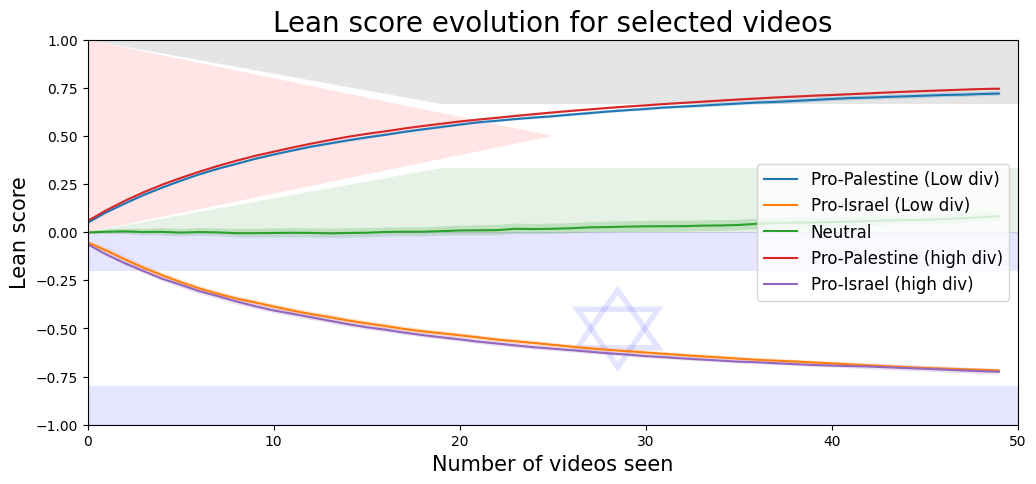

MATRIX SHAPE: (57, 50)
[[0.6802252  0.67429009 0.66609798 ... 0.36249536 0.35867821 0.3549475 ]
 [0.6802252  0.68041013 0.67682616 ... 0.36249536 0.35867821 0.3549475 ]
 [0.6802252  0.67429009 0.66609798 ... 0.41123136 0.40683941 0.40254813]
 ...
 [0.6802252  0.68041013 0.67682616 ... 0.41123136 0.40683941 0.42252629]
 [0.6802252  0.68041013 0.67682616 ... 0.40173363 0.39768046 0.39371392]
 [0.6802252  0.67429009 0.66609798 ... 0.34023154 0.33657907 0.33301132]]
MATRIX SHAPE: (52, 50)
[[0.6802252  0.67429009 0.66609798 ... 0.34023154 0.33657907 0.33301132]
 [0.6802252  0.67429009 0.66609798 ... 0.34023154 0.33657907 0.33301132]
 [0.6802252  0.68041013 0.67682616 ... 0.41123136 0.40683941 0.40254813]
 ...
 [0.6802252  0.67429009 0.67682616 ... 0.38291807 0.40069776 0.44392123]
 [0.6802252  0.67429009 0.66609798 ... 0.48145745 0.47635277 0.47136334]
 [0.6802252  0.68041013 0.67682616 ... 0.5355545  0.53000498 0.52457641]]
MATRIX SHAPE: (49, 50)
[[0.6802252  0.67429009 0.67682616 ... 0.77

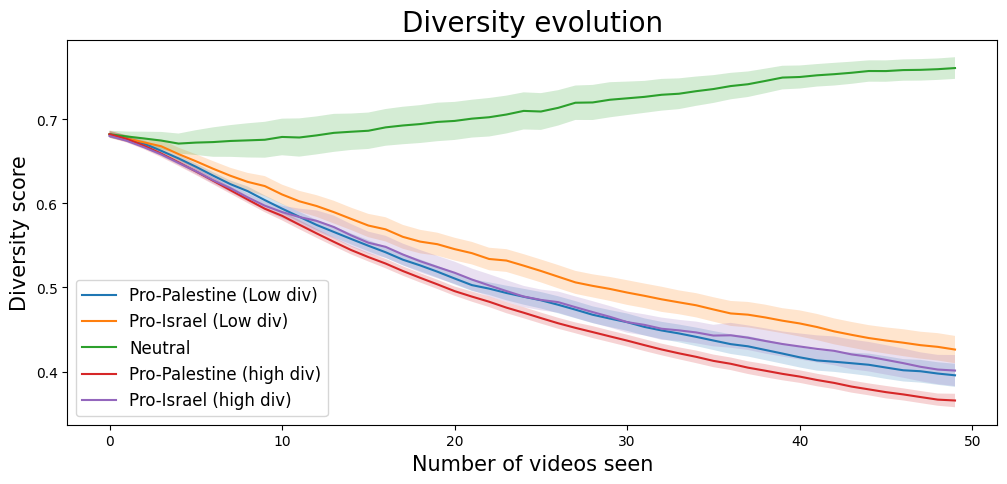

In [53]:
def selected_items_lean_evolution_per_session(session_id: str, window_size: Optional[int] = None,) -> list:

    context_videos = get_context_videos(session_id)
    context_videos_shuffled = context_videos.sample(frac=1)
    nbr_context_videos = len(context_videos)

    query = f"""
            SELECT rl.recommended_video_id AS video_id, rl.depth , v.llm_label
            FROM recommendation_log rl
            INNER JOIN annoted_videos v ON v.video_youtube_id = rl.recommended_video_id
            WHERE session_id ='{session_id}'
            AND was_during_context = 0
            AND was_selected = 1
            ORDER BY rl.depth ASC
          """
    chosen_videos = db_connection.select(query)

    all_videos = pd.concat([context_videos_shuffled,chosen_videos], ignore_index=True)

    lean_scores = []
    diversity_scores = []
    for i in range(nbr_context_videos+1, len(all_videos)+1):
        if window_size:
            start_index = max(0, i - window_size)
            lean_scores.append(compute_lean_score(all_videos.iloc[start_index:i]))
            diversity_scores.append(compute_shanon_entropy(compute_proportions(all_videos.iloc[start_index:i])))
        else:
            lean_scores.append(compute_lean_score(all_videos.iloc[:i]))
            diversity_scores.append(compute_shanon_entropy(compute_proportions(all_videos.iloc[:i])))

    return lean_scores,diversity_scores


def selected_items_lean_evolution_per_persona(personna: str, window_size: Optional[int] = None) -> list:
    sessions = get_sessions_by_profile(personna)

    all_lean_vectors = []
    all_div_vectors = []
    for session in sessions:
        lean_scores,diversity_scores = selected_items_lean_evolution_per_session(session, window_size)
        all_lean_vectors.append(lean_scores[:session_length])
        all_div_vectors.append(diversity_scores[:session_length])

    # Convert to numpy array (shape: num_sessions x vector_length)
    all_lean_vectors = np.array(all_lean_vectors)
    mean_lean_vector = np.mean(all_lean_vectors, axis=0)

    all_div_vectors = np.array(all_div_vectors)
    mean_div_vector = np.mean(all_div_vectors,axis=0)


    return mean_lean_vector,mean_div_vector, all_lean_vectors, all_div_vectors



(lean_selected_items_pro_palestine, div_selected_items_pro_palestine, 
all_lean_selected_items_pro_palestine, all_div_selected_items_pro_palestine) = selected_items_lean_evolution_per_persona('Pro_palestine_low_div_En_v3')

(lean_selected_items_pro_israel,div_selected_items_pro_israel,
 all_lean_selected_items_pro_israel, all_div_selected_items_pro_israel) = selected_items_lean_evolution_per_persona('Pro_israel_low_div_En_v3')

(lean_selected_items_neutral, div_selected_items_neutral,
 all_lean_selected_items_neutral, all_div_selected_items_neutral) = selected_items_lean_evolution_per_persona('Neutral_low_div_En_v3')

(lean_selected_items_pro_palestine_high_div,div_selected_items_pro_palestine_high_div,
 all_lean_selected_items_pro_palestine_high_div, all_div_selected_items_pro_palestine_high_div) = selected_items_lean_evolution_per_persona('Pro_palestine_high_div_En_v3')


(lean_selected_items_pro_israel_high_div,div_selected_items_pro_israel_high_div,
 all_lean_selected_items_pro_israel_high_div, all_div_selected_items_pro_israel_high_div) =  selected_items_lean_evolution_per_persona('Pro_israel_high_div_En_v3')

data = [all_lean_selected_items_pro_palestine, all_lean_selected_items_pro_israel,all_lean_selected_items_neutral,
        all_lean_selected_items_pro_palestine_high_div, all_lean_selected_items_pro_israel_high_div ]
plot_with_flags(data=data, title="Lean score evolution for selected videos",labels=["Pro-Palestine (Low div)","Pro-Israel (Low div)",
                                                                                    "Neutral", "Pro-Palestine (high div)",
                                                                                    "Pro-Israel (high div)"], with_confidence_interval=True)


data = [all_div_selected_items_pro_palestine,all_div_selected_items_pro_israel,all_div_selected_items_neutral,
        all_div_selected_items_pro_palestine_high_div,all_div_selected_items_pro_israel_high_div]

plot_diversity_evolution(data,title ="Diversity evolution",labels=["Pro-Palestine (Low div)","Pro-Israel (Low div)",
                                                                                    "Neutral", "Pro-Palestine (high div)",
                                                                                    "Pro-Israel (high div)"], with_confidence_interval=True)

    

### 1.2.2. For recommended items  

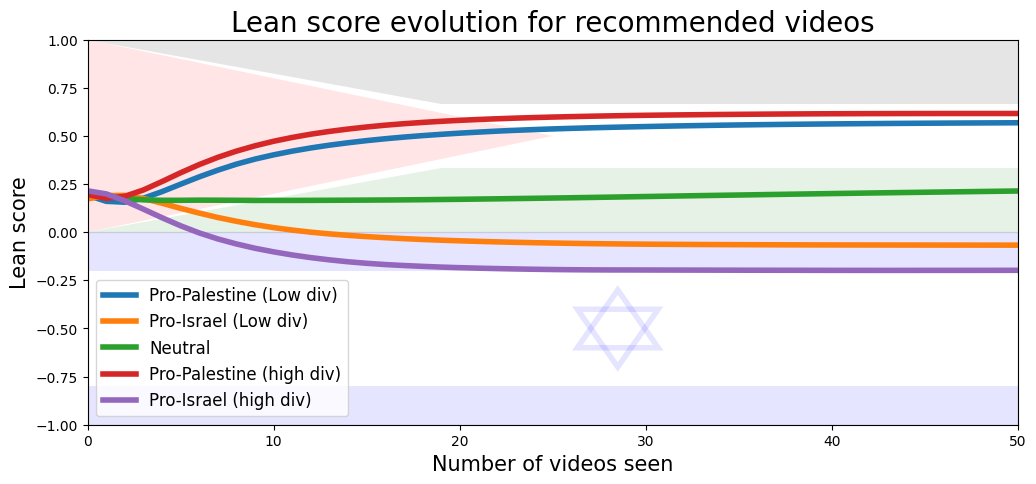

In [54]:
def recommended_items_lean_evolution_per_session(session_id: str, window_size: Optional[int] = None) -> list:
    # Escape single quotes for safety when using f-strings in SQL
    session_id_esc = session_id.replace("'", "''")

    # 1) Context once + reproducible shuffle
    context_videos = get_recommended_videos_during_context_phase(session_id)
    context_videos_shuffled = context_videos.sample(frac=1, ignore_index=True)

    # 2) Bounds once
    nbr_context_videos = db_connection.select_single_value(
        f"""
        SELECT MAX(depth) AS max_depth
        FROM recommendation_log
        WHERE session_id = '{session_id_esc}'
          AND was_during_context = 1
        """
    )
    max_depth = db_connection.select_single_value(
        f"""
        SELECT MAX(depth) AS max_depth
        FROM recommendation_log
        WHERE session_id = '{session_id_esc}'
        """
    )

    if nbr_context_videos is None or max_depth is None:
        return []

    # 3) All non-context recs once, ordered by depth
    recs_df = db_connection.select(
        f"""
        SELECT
            rl.recommended_video_id AS video_id,
            rl.depth,
            rl.recommendation_rank,
            v.llm_label
        FROM recommendation_log rl
        INNER JOIN annoted_videos v
          ON v.video_youtube_id = rl.recommended_video_id
        WHERE rl.session_id = '{session_id_esc}'
          AND rl.was_during_context = 0
        ORDER BY rl.depth ASC
        """
    )


    # 4) If no recs, just score context for each step
    if len(recs_df) == 0:
        base_view = context_videos_shuffled
        if window_size:
            start_idx = max(0, len(base_view) - window_size)
            score = compute_lean_score(base_view.iloc[start_idx:])
        else:
            score = compute_lean_score(base_view)
        return [score] * (int(max_depth) - int(nbr_context_videos) + 1)

    # 5) Precompute cum-count per depth (how many rec rows have depth <= d)
    counts = (
        recs_df["depth"]
        .value_counts()
        .rename_axis("depth")
        .reset_index(name="cnt")
        .sort_values("depth")
    )
    counts["cum_cnt"] = counts["cnt"].cumsum()

    depth_min = int(counts["depth"].min())
    depth_max = int(counts["depth"].max())

    full = (
        pd.DataFrame({"depth": range(depth_min, depth_max + 1)})
        .merge(counts[["depth", "cum_cnt"]], on="depth", how="left")
        .sort_values("depth")
    )
    full["cum_cnt"] = full["cum_cnt"].ffill().fillna(0).astype(int)

    def cum_rows_for_depth(d: int) -> int:
        d = int(d)
        if d < depth_min:
            return 0
        if d > depth_max:
            return int(full["cum_cnt"].iloc[-1])
        return int(full.loc[full["depth"] == d, "cum_cnt"].iloc[0])

    # 6) Build base and emulate "re-append ≤ depth block each step"
    base = pd.concat([context_videos_shuffled, recs_df], ignore_index=True)
    C = len(context_videos_shuffled)
    rec_prefix_indices = list(range(C, C + len(recs_df)))

    lean_scores = []
    div_scores = []
    current_indices: list[int] = list(range(C))  # start with context only

    for d in range(int(nbr_context_videos), int(max_depth) + 1):
        r = cum_rows_for_depth(d)
        if r > 0:
            current_indices.extend(rec_prefix_indices[:r])  # duplicate-append to match original

        view = base.iloc[current_indices]
        if window_size:
            start_idx = max(0, len(view) - window_size)
            lean_scores.append(compute_lean_score(view.iloc[start_idx:]))
            div_scores.append(compute_shanon_entropy(compute_proportions(view.iloc[start_idx:])))
        else:
            lean_scores.append(compute_lean_score(view))
            div_scores.append(compute_shanon_entropy(compute_proportions(view.iloc[:])))

    return lean_scores,div_scores



def recommended_items_evolution_per_persona(personna: str, window_size: Optional[int] = None) -> list:
    sessions = get_sessions_by_profile(personna)

    all_lean_vectors = []
    all_div_vectors = []
    for session in sessions:
        lean_scores,diversity_scores = recommended_items_lean_evolution_per_session(session, window_size)
        all_lean_vectors.append(lean_scores)
        all_div_vectors.append(diversity_scores)

    # Convert to numpy array (shape: num_sessions x vector_length)
    all_lean_vectors = np.array(all_lean_vectors)
    mean_lean_vector = np.mean(all_lean_vectors, axis=0)

    all_div_vectors = np.array(all_div_vectors)
    mean_div_vector = np.mean(all_div_vectors,axis=0)


    return mean_lean_vector,mean_div_vector,all_lean_vectors,all_div_vectors


(lean_recommended_iems_pro_palestine, div_recommended_iems_pro_palestine, 
 all_lean_vectors_pro_palestine, all_div_vectors_pro_palestine) = recommended_items_evolution_per_persona('Pro_palestine_low_div_En_v3')

(lean_recommended_iems_pro_israel, div_recommended_iems_pro_israel, 
 all_lean_vectors_pro_israel, all_div_vectors_pro_israel) = recommended_items_evolution_per_persona('Pro_israel_low_div_En_v3')

(lean_recommended_iems_neutral, div_recommended_iems_neutral, 
 all_lean_vectors_neutral, all_div_vectors_neutral) = recommended_items_evolution_per_persona('Neutral_low_div_En_v3')

(lean_recommended_iems_pro_palestine_high_div, div_recommended_iems_pro_palestine_high_div,
 all_lean_vectors_pro_palestine_high_div, all_div_vectors_pro_palestine_high_div) = recommended_items_evolution_per_persona('Pro_palestine_high_div_En_v3')

(lean_recommended_iems_pro_israel_high_div, div_recommended_iems_pro_israel_high_div, 
 all_lean_vectors_pro_israel_high_div, all_div_vectors_pro_israel_high_div) = recommended_items_evolution_per_persona('Pro_israel_high_div_En_v3')

data = [all_lean_vectors_pro_palestine, all_lean_vectors_pro_israel, all_lean_vectors_neutral,all_lean_vectors_pro_palestine_high_div,all_lean_vectors_pro_israel_high_div]
plot_with_flags(data=data, title="Lean score evolution for recommended videos",labels=["Pro-Palestine (Low div)","Pro-Israel (Low div)",
                                                                                    "Neutral", "Pro-Palestine (high div)",
                                                                                    "Pro-Israel (high div)"])

data =[div_recommended_iems_pro_palestine,div_recommended_iems_pro_israel, div_recommended_iems_neutral,div_recommended_iems_pro_palestine_high_div,div_recommended_iems_pro_israel_high_div]




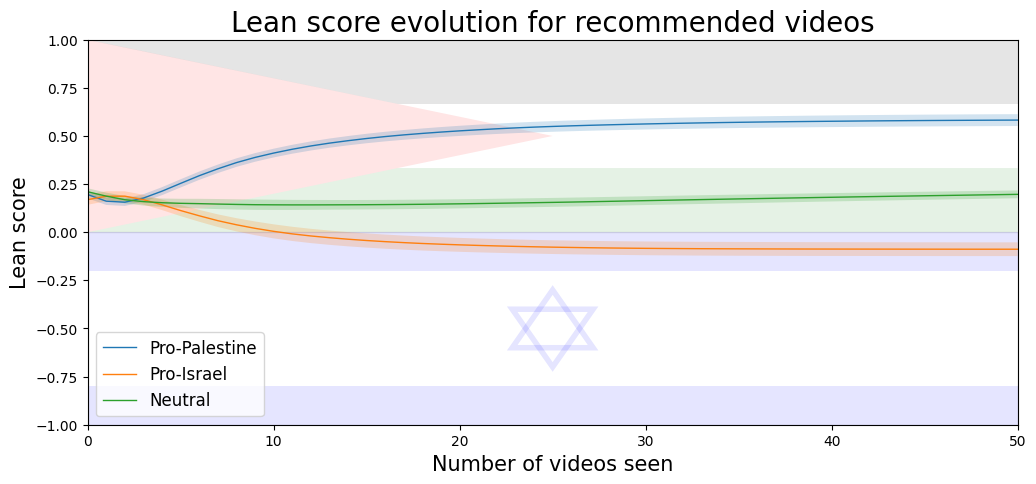

MATRIX SHAPE: (57, 51)
[[0.86007034 0.86677929 0.8669254  ... 0.63923276 0.63970678 0.64020204]
 [0.78249638 0.78781624 0.79005679 ... 0.56382003 0.56344549 0.56313566]
 [0.76740458 0.77111057 0.76543488 ... 0.46493105 0.46409976 0.46347114]
 ...
 [0.76831855 0.77466784 0.77304541 ... 0.59542528 0.59613463 0.59679142]
 [0.72896545 0.74073047 0.74856334 ... 0.48700748 0.48718633 0.4874689 ]
 [0.76518913 0.77224433 0.76111939 ... 0.43327994 0.432651   0.43208584]]
MATRIX SHAPE: (52, 51)
[[0.74553039 0.73553851 0.73329041 ... 0.71122786 0.71070505 0.71014566]
 [0.77680422 0.77090046 0.78010929 ... 0.65411501 0.65337241 0.65266113]
 [0.83721015 0.83143322 0.82692488 ... 0.79462459 0.79464235 0.79468582]
 ...
 [0.77549319 0.77226814 0.76751672 ... 0.81434129 0.81534341 0.81633501]
 [0.77346885 0.77421096 0.77417106 ... 0.83430265 0.83374089 0.83305406]
 [0.81374592 0.82391272 0.83300907 ... 0.85385374 0.85377232 0.85364947]]
MATRIX SHAPE: (49, 51)
[[0.75837154 0.76861527 0.77285978 ... 0.84

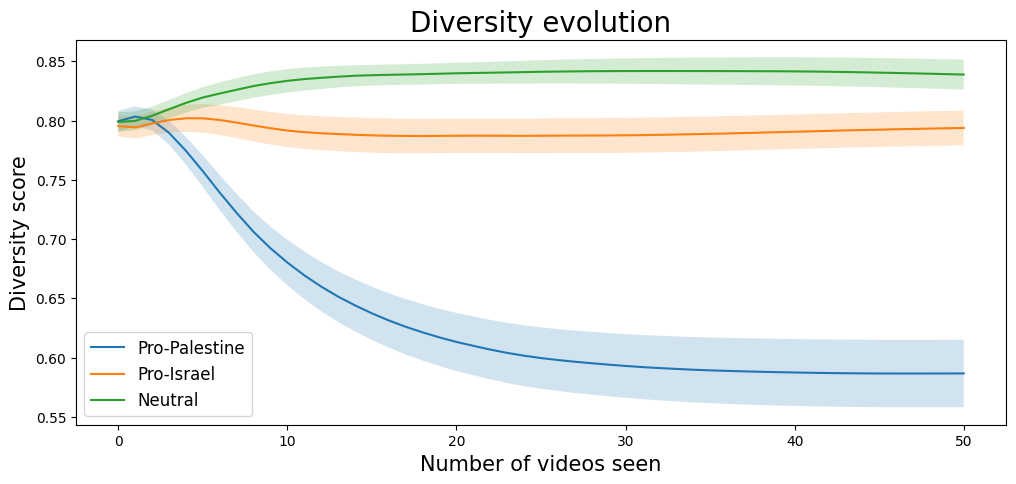

In [85]:
def _lean_score(df: pd.DataFrame, rank_aware: bool) -> float:
    if rank_aware:
        # ensure a recommendation_rank exists; if missing, make a simple 1..n
        if "recommendation_rank" not in df.columns:
            df = df.copy()
            df["recommendation_rank"] = np.arange(1, len(df) + 1)
        return compute_rank_aware_lean_score(df)
    else:
        return compute_lean_score(df)

def _proportions(df: pd.DataFrame, rank_aware: bool) -> dict:
    if rank_aware:
        if "recommendation_rank" not in df.columns:
            df = df.copy()
            df["recommendation_rank"] = np.arange(1, len(df) + 1)
        return compute_rank_aware_proportions(df)
    else:
        return compute_proportions(df)

# --- main functions ---

def recommended_items_lean_evolution_per_session(
    session_id: str,
    window_size: Optional[int] = None,
    rank_aware: bool = False
) -> Tuple[list, list]:
    # Escape single quotes for safety when using f-strings in SQL
    session_id_esc = session_id.replace("'", "''")

    # 1) Context once + reproducible shuffle
    context_videos = get_recommended_videos_during_context_phase(session_id)
    context_videos_shuffled = context_videos.sample(frac=1, ignore_index=True)

    # 2) Bounds once
    nbr_context_videos = db_connection.select_single_value(
        f"""
        SELECT MAX(depth) AS max_depth
        FROM recommendation_log
        WHERE session_id = '{session_id_esc}'
          AND was_during_context = 1
        """
    )
    max_depth = db_connection.select_single_value(
        f"""
        SELECT MAX(depth) AS max_depth
        FROM recommendation_log
        WHERE session_id = '{session_id_esc}'
        """
    )

    if nbr_context_videos is None or max_depth is None:
        return [], []

    # 3) All non-context recs once, ordered by depth
    recs_df = db_connection.select(
        f"""
        SELECT
            rl.recommended_video_id AS video_id,
            rl.depth,
            rl.recommendation_rank,
            v.llm_label
        FROM recommendation_log rl
        INNER JOIN annoted_videos v
          ON v.video_youtube_id = rl.recommended_video_id
        WHERE rl.session_id = '{session_id_esc}'
          AND rl.was_during_context = 0
        ORDER BY rl.depth ASC
        """
    )

    # 4) If no recs, just score context for each step (same score repeated)
    steps = int(max_depth) - int(nbr_context_videos) + 1
    if len(recs_df) == 0:
        base_view = context_videos_shuffled
        if window_size:
            start_idx = max(0, len(base_view) - window_size)
            view = base_view.iloc[start_idx:]
        else:
            view = base_view

        lean = _lean_score(view, rank_aware)
        div = compute_shanon_entropy(_proportions(view, rank_aware))
        return [lean] * steps, [div] * steps

    # 5) Precompute cum-count per depth (how many rec rows have depth <= d)
    counts = (
        recs_df["depth"]
        .value_counts()
        .rename_axis("depth")
        .reset_index(name="cnt")
        .sort_values("depth")
    )
    counts["cum_cnt"] = counts["cnt"].cumsum()

    depth_min = int(counts["depth"].min())
    depth_max = int(counts["depth"].max())

    full = (
        pd.DataFrame({"depth": range(depth_min, depth_max + 1)})
        .merge(counts[["depth", "cum_cnt"]], on="depth", how="left")
        .sort_values("depth")
    )
    full["cum_cnt"] = full["cum_cnt"].ffill().fillna(0).astype(int)

    def cum_rows_for_depth(d: int) -> int:
        d = int(d)
        if d < depth_min:
            return 0
        if d > depth_max:
            return int(full["cum_cnt"].iloc[-1])
        return int(full.loc[full["depth"] == d, "cum_cnt"].iloc[0])

    # 6) Build base and emulate "re-append ≤ depth block each step"
    base = pd.concat([context_videos_shuffled, recs_df], ignore_index=True)
    C = len(context_videos_shuffled)
    rec_prefix_indices = list(range(C, C + len(recs_df)))

    lean_scores: list[float] = []
    div_scores: list[float] = []
    current_indices: list[int] = list(range(C))  # start with context only

    for d in range(int(nbr_context_videos), int(max_depth) + 1):
        r = cum_rows_for_depth(d)
        if r > 0:
            # duplicate-append to match original behavior
            current_indices.extend(rec_prefix_indices[:r])

        view = base.iloc[current_indices]
        if window_size:
            start_idx = max(0, len(view) - window_size)
            view_slice = view.iloc[start_idx:]
        else:
            view_slice = view

        lean_scores.append(_lean_score(view_slice, rank_aware))
        div_scores.append(
            compute_shanon_entropy(_proportions(view_slice, rank_aware))
        )

    return lean_scores, div_scores


def recommended_items_evolution_per_persona(
    personna: str,
    window_size: Optional[int] = None,
    rank_aware: bool = False
):
    sessions = get_sessions_by_profile(personna)

    all_lean_vectors = []
    all_div_vectors = []
    for session in sessions:
        lean_scores, diversity_scores = recommended_items_lean_evolution_per_session(
            session, window_size=window_size, rank_aware=rank_aware
        )
        all_lean_vectors.append(lean_scores)
        all_div_vectors.append(diversity_scores)

    # Convert to numpy array (shape: num_sessions x vector_length)
    all_lean_vectors = np.array(all_lean_vectors, dtype=float)
    mean_lean_vector = np.mean(all_lean_vectors, axis=0) if len(all_lean_vectors) else np.array([])

    all_div_vectors = np.array(all_div_vectors, dtype=float)
    mean_div_vector = np.mean(all_div_vectors, axis=0) if len(all_div_vectors) else np.array([])

    return mean_lean_vector, mean_div_vector, all_lean_vectors, all_div_vectors


# ---- usage (set rank_aware=True to switch) ----

(lean_recommended_iems_pro_palestine, div_recommended_iems_pro_palestine, 
 all_lean_vectors_pro_palestine, all_div_vectors_pro_palestine) = recommended_items_evolution_per_persona(
    'Pro_palestine_low_div_En_v3', rank_aware=True  
)


(lean_recommended_iems_pro_israel, div_recommended_iems_pro_israel, 
 all_lean_vectors_pro_israel, all_div_vectors_pro_israel) = recommended_items_evolution_per_persona(
    'Pro_israel_low_div_En_v3', rank_aware=True
)

(lean_recommended_iems_neutral, div_recommended_iems_neutral, 
 all_lean_vectors_neutral, all_div_vectors_neutral) = recommended_items_evolution_per_persona(
    'Neutral_low_div_En_v3', rank_aware=True
)

#(lean_recommended_iems_pro_palestine_high_div, div_recommended_iems_pro_palestine_high_div,
# all_lean_vectors_pro_palestine_high_div, all_div_vectors_pro_palestine_high_div) = recommended_items_evolution_per_persona(
#    'Pro_palestine_high_div_En_v3', rank_aware=True
#)

#(lean_recommended_iems_pro_israel_high_div, div_recommended_iems_pro_israel_high_div, 
# all_lean_vectors_pro_israel_high_div, all_div_vectors_pro_israel_high_div) = recommended_items_evolution_per_persona(
#    'Pro_israel_high_div_En_v3', rank_aware=True
#)

data = [
    all_lean_vectors_pro_palestine,
    all_lean_vectors_pro_israel,
    all_lean_vectors_neutral
]


plot_with_flags(
    data=data,
    title="Lean score evolution for recommended videos",
    labels=[
        "Pro-Palestine",
        "Pro-Israel",
        "Neutral",
    ],
    with_confidence_interval=True
)

data = [
    all_div_vectors_pro_palestine,
    all_div_vectors_pro_israel,
    all_div_vectors_neutral
]

plot_diversity_evolution(
    data,
    title="Diversity evolution",
    labels=[
        "Pro-Palestine",
        "Pro-Israel",
        "Neutral",

    ],
    with_confidence_interval=True
)

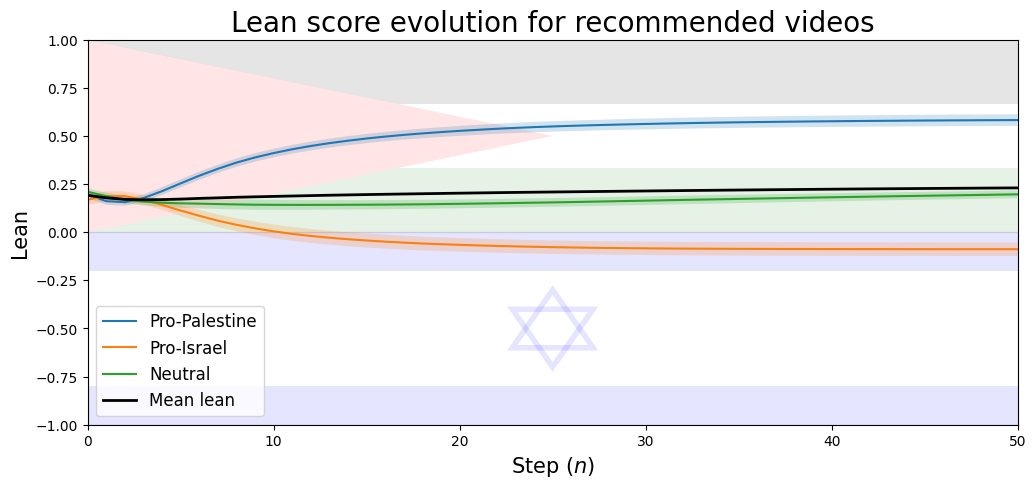

In [ ]:



data = [
    all_lean_vectors_pro_palestine,
    all_lean_vectors_pro_israel,
    all_lean_vectors_neutral
]

plot_with_flags(
    data=data,
    title="Lean score evolution for recommended videos",
    labels=[
        "Pro-Palestine",
        "Pro-Israel",
        "Neutral"
    ],
    with_confidence_interval=True,
    plot_mean=True
)

## LINEAR MIXE MODELS

In [95]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from scipy.stats import norm

# ===== choose how many steps to include per user =====
MAX_STEPS = 50   # e.g., first 10 navigation steps

# ---------- 1) Build long dataframe from your arrays ----------
def _stack_persona(all_lean_vectors, persona_label, max_steps=None):
    """Convert per-user lean vectors to long format; optionally truncate to max_steps."""
    rows = []
    for i, vec in enumerate(all_lean_vectors):
        vec = np.asarray(vec, dtype=float)
        mask = np.isfinite(vec)
        if not np.any(mask):
            continue
        steps = np.arange(len(vec))[mask]
        tmp = pd.DataFrame({
            "user_id": f"{persona_label}_{i}",
            "step_idx": steps,
            "lean": vec[mask],
            "persona": persona_label
        })
        if max_steps is not None:
            tmp = tmp[tmp["step_idx"] < max_steps]
        rows.append(tmp)
    return pd.concat(rows, ignore_index=True) if rows else pd.DataFrame(
        columns=["user_id","step_idx","lean","persona"]
    )

# Expect these arrays to exist: all_lean_vectors_pro_palestine, all_lean_vectors_pro_israel, all_lean_vectors_neutral
df_pp  = _stack_persona(all_lean_vectors_pro_palestine, "ProPal", MAX_STEPS)
df_pi  = _stack_persona(all_lean_vectors_pro_israel,    "ProIsr", MAX_STEPS)
df_neu = _stack_persona(all_lean_vectors_neutral,       "Neutral", MAX_STEPS)
df = pd.concat([df_pp, df_pi, df_neu], ignore_index=True)

# ---------- 2) Preprocess ----------
df["step_c"] = df["step_idx"].astype(int)  # 0-based steps → step_c=0 is first post-context step
df["persona"] = pd.Categorical(df["persona"], categories=["Neutral","ProPal","ProIsr"])
df = df[np.isfinite(df["lean"])].copy()

print(f"\nUsing first {MAX_STEPS} steps per user. N={len(df)}, users={df['user_id'].nunique()}.")

# ---------- 3) Fit the REDUCED mixed model (no persona main effects) ----------
# lean ~ β0 + β1*step_c + β4*(step_c:ProPal) + β5*(step_c:ProIsr)
reduced_formula = "lean ~ step_c + step_c:persona"

def fit_mixedlm(data, formula, re_formula):
    md = smf.mixedlm(formula, data, groups=data["user_id"], re_formula=re_formula)
    return md.fit(method="lbfgs", maxiter=500, disp=False)  # REML default is fine

try:
    m = fit_mixedlm(df, reduced_formula, re_formula="~ step_c")   # random intercept + slope
    note = "Reduced model fitted with random intercept + slope."
except Exception:
    m = fit_mixedlm(df, reduced_formula, re_formula="~ 1")        # fallback: random intercept only
    note = "Reduced model fitted with random intercept only."

print("\n=== Reduced MixedLM summary ===")
print(m.summary())
print(f"[Note] {note}")

# ---------- 4) Tests ----------
# (a) Initial intercept test: H0: β0 = 0  (baseline at step 0, common to all personas)
beta0 = m.fe_params["Intercept"]
se_beta0 = m.bse_fe["Intercept"]
z0 = beta0 / se_beta0
p0 = 2 * (1 - norm.cdf(abs(z0)))
lo0 = beta0 - 1.96 * se_beta0
hi0 = beta0 + 1.96 * se_beta0
print("\n=== Test H0: β0 (Intercept) = 0 ===")
print(f"β0 = {beta0:.6f}, SE = {se_beta0:.6f}, z = {z0:.3f}, p = {p0:.4g}")
print(f"95% CI: [{lo0:.6f}, {hi0:.6f}]")
print("→ Significant baseline algorithmic bias." if p0 < 0.05 else "→ No significant baseline algorithmic bias detected.")

# (b) Interaction slope tests: H0: β4 = 0 and H0: β5 = 0
term_pp = "step_c:persona[T.ProPal]"  # β4
term_pi = "step_c:persona[T.ProIsr]"  # β5

def z_test_term(model, term):
    if term not in model.bse_fe.index:
        print(f"\n[Warn] Term '{term}' not found among fixed effects (maybe aliased).")
        return None
    est = model.fe_params[term]
    se  = model.bse_fe[term]
    z   = est / se
    p   = 2 * (1 - norm.cdf(abs(z)))
    lo  = est - 1.96 * se
    hi  = est + 1.96 * se
    print(f"\n=== Test H0: {term} = 0 ===")
    print(f"{term}: estimate = {est:.6f}, SE = {se:.6f}, z = {z:.3f}, p = {p:.4g}")
    print(f"95% CI: [{lo:.6f}, {hi:.6f}]")
    return est, se, z, p, lo, hi

res_pp = z_test_term(m, term_pp)  # β4
res_pi = z_test_term(m, term_pi)  # β5

# ---------- 5) Implied slopes for each persona ----------
b = m.params
get = lambda name: float(b[name]) if name in b.index else 0.0
beta_step          = get("step_c")                # Neutral slope β1
delta_ProPal_slope = get(term_pp)                 # β4
delta_ProIsr_slope = get(term_pi)                 # β5

print("\n=== Slopes (per step) implied by reduced model ===")
print(f"Neutral slope: {beta_step:.6f}")
print(f"ProPal  slope: {beta_step + delta_ProPal_slope:.6f}")
print(f"ProIsr  slope: {beta_step + delta_ProIsr_slope:.6f}")



Using first 50 steps per user. N=7900, users=158.

=== Reduced MixedLM summary ===
               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     lean      
No. Observations:     7900        Method:                 REML      
No. Groups:           158         Scale:                  0.0032    
Min. group size:      50          Log-Likelihood:         10797.0121
Max. group size:      50          Converged:              Yes       
Mean group size:      50.0                                          
--------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                 0.180    0.010  17.358 0.000  0.159  0.200
step_c                    0.001    0.000   1.818 0.069 -0.000  0.001
step_c:persona[T.ProPal]  0.008    0.001  14.143 0.000  0.007  0.009
step_c:persona[T.ProIsr] -0.006    

/Users/colintimmers/Documents/PhD/YoutubeStats_project/YoutubeStats_results_analysis/.venv/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
